In [42]:
import numpy as np
from scipy.stats import bootstrap
! pip install matplotlib


/home/ubuntu/.bashrc: line 1: /etc/profile.d/dlami.sh: No such file or directory


In [43]:
shared_amp = 0.2   # shared across subjects
noise_amp = 0.8
nvox = 50
nsubj = 20
nbootstrap = 1000

In [44]:
shared = np.random.randn(nvox) * shared_amp
noise = np.random.randn(nsubj, nvox) * noise_amp
sig = shared + noise


In [45]:
allcorr = []
for ind in range(nbootstrap):
    subj = np.random.randint(0, nsubj, nsubj)
    mean_sig = np.mean(sig[subj, :], axis=0)
    allcorr.append(np.corrcoef(mean_sig, shared)[0, 1])


mean of bootstraps 0.727719802241728
observed 0.8452691175092829


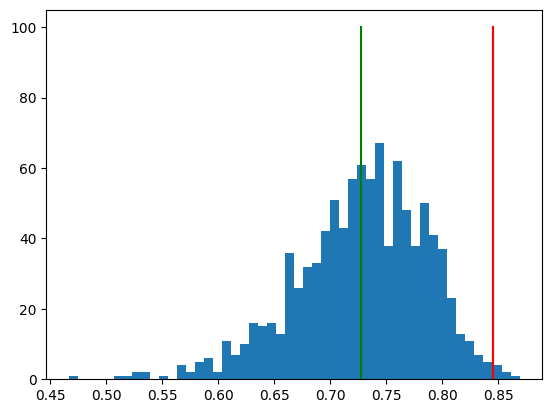

In [46]:
from matplotlib import pyplot as plt
observed = np.corrcoef(np.mean(sig,axis =0), shared)[1,0]
plt.hist(allcorr, bins=50)
plt.plot([observed,observed],[0,100],'r')
bootmean = np.mean(allcorr)
print(f'mean of bootstraps {bootmean}')
print(f'observed {observed}')
plt.plot([observed,observed],[0,100],'r')
plt.plot([bootmean,bootmean],[0,100],'g')

